In [ ]:
from google.colab import files
import pandas as pd
import io


In [ ]:
hotels = pd.read_csv('features_hotels.csv', index_col=['hotel_id', 'city'])
sample = pd.read_csv('sample_submission.csv')
test_set = pd.read_csv('test_set.csv')

In [ ]:
df1 = pd.read_csv('dataset_1.csv')
df2 = pd.read_csv('dataset_2.csv')
df3 = pd.read_csv('dataset_3.csv')
df4 = pd.read_csv('dataset_4.csv')
df5 = pd.read_csv('dataset_5.csv')
df6 = pd.read_csv('dataset_6.csv')

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5,df6])
df.head()

,Unnamed: 0,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,0,967,83,0,amsterdam,5,austrian,1,125454
1,1,588,184,0,amsterdam,5,austrian,1,125454
2,2,317,214,6,amsterdam,5,austrian,1,125454
3,3,387,439,5,amsterdam,5,austrian,1,125454
4,4,660,182,1,amsterdam,5,austrian,1,125454


In [ ]:
df_final = df.join(hotels, on=['hotel_id', 'city'])
df_final.head()

,Unnamed: 0,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,0,967,83,0,amsterdam,5,austrian,1,125454,Independant,Independant,1,0,0
1,1,588,184,0,amsterdam,5,austrian,1,125454,Independant,Independant,0,0,0
2,2,317,214,6,amsterdam,5,austrian,1,125454,Accar Hotels,Marcure,0,0,0
3,3,387,439,5,amsterdam,5,austrian,1,125454,Accar Hotels,Safitel,1,0,0
4,4,660,182,1,amsterdam,5,austrian,1,125454,Chillton Worldwide,Tripletree,0,0,0


In [ ]:
test_set_joined = test_set.join(hotels, on=['hotel_id', 'city'])
test_set_joined.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy
0,0,1,vilnius,21,romanian,0,1,161,46,Boss Western,J.Halliday Inn,1,0,0
1,1,1,vilnius,21,romanian,0,1,187,32,Accar Hotels,Marcure,1,1,0
2,2,1,vilnius,21,romanian,0,1,279,12,Independant,Independant,1,0,0
3,3,1,vilnius,21,romanian,0,1,395,10,Accar Hotels,Ibas,0,0,0
4,4,1,vilnius,21,romanian,0,1,488,42,Accar Hotels,Safitel,1,1,1


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
y = df_final['price']
X = df_final.drop(['Unnamed: 0','price'], axis=1)

In [ ]:
rf = RandomForestRegressor()
X_test = test_set_joined[['hotel_id','stock','city','date','language','mobile', 'avatar_id','group','brand','parking','pool','children_policy']]
X_dummies = pd.get_dummies(X)
rf.fit(X_dummies,y)

RandomForestRegressor()

In [ ]:
X_test_dummies = pd.get_dummies(X_test)
y_pred = rf.predict(X_test_dummies)
y_pred = pd.Series(y_pred)

In [ ]:
index = test_set_joined['index']
df_submission = pd.concat([index,y_pred], axis=1)
df_submission.columns = ['index' , 'price']
df_submission.set_index('index')
df_submission.drop(['index'], axis=1)
#len(df_submission)
dff = df_submission[['index', 'price']]
dff.set_index(dff['index'])
dff.head()

,index,price
0,0,111.77
1,1,145.31
2,2,63.62
3,3,54.25
4,4,192.11


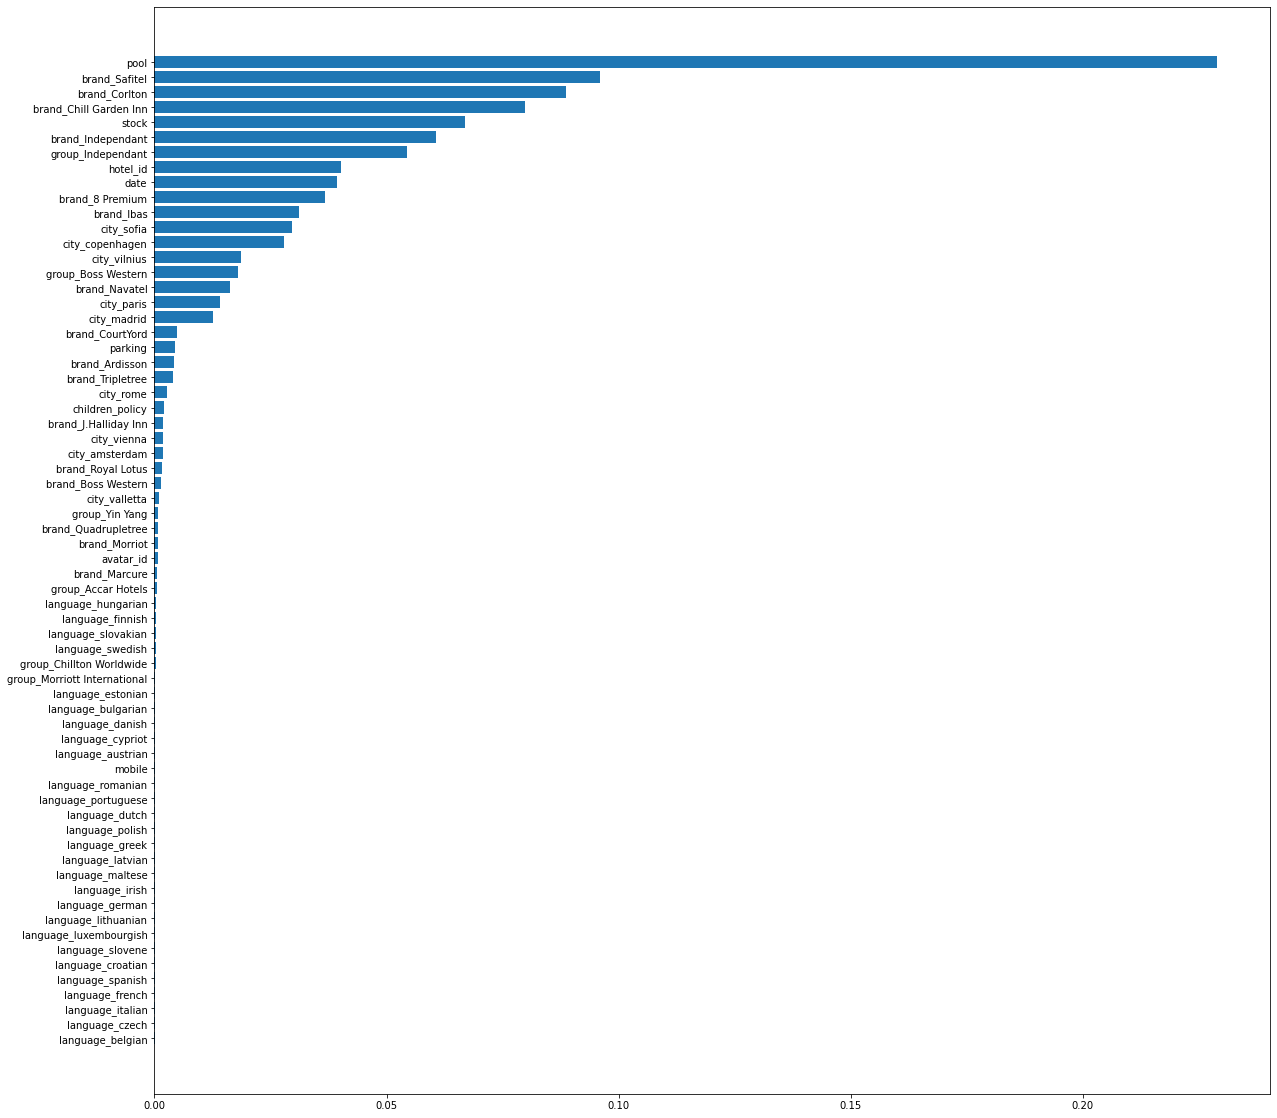

In [ ]:
import matplotlib.pyplot as plt
importances = rf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(20,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_dummies.columns)[indices])

In [ ]:
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.0 MB 21.8 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 83.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 26.2 MB/s eta 0:00:00
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=328711 sha256=fd8b7cf84b12407031dc48af52829a8230c690814355a800579bc5789f4ed4d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-uhx6hn6e/wheels/8e/70/3e/0fedd1728e310b5af797b1c8a9ef27ebf4046917c84a2fe736
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha25

In [ ]:
import pandas_profiling as pdp 
X.head()
profile = pdp.ProfileReport(X)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

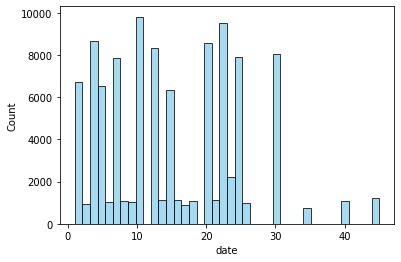

In [ ]:
import seaborn as sns
sns.histplot(data=df_final['date'], bins=40, color="skyblue")

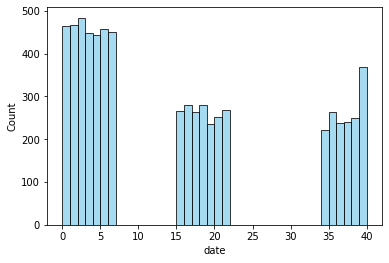

In [ ]:
sns.histplot(data=X_test_dummies['date'], bins=40, color="skyblue")

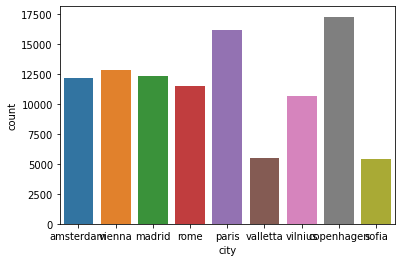

In [ ]:
sns.countplot(data=df_final, x="city")

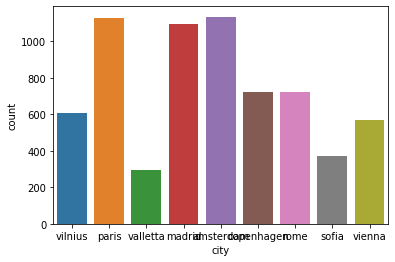

In [ ]:
sns.countplot(data=X_test, x="city")

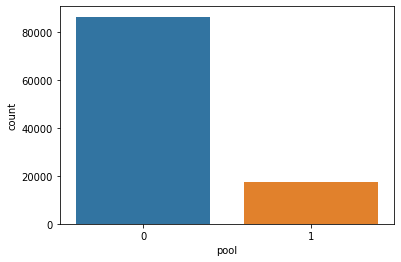

In [ ]:
sns.countplot(data=df_final, x="pool")

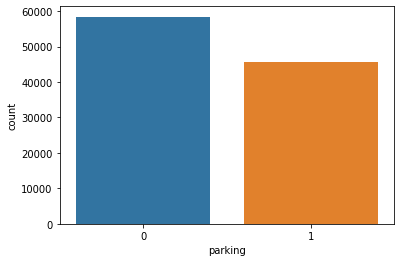

In [ ]:
sns.countplot(data=df_final, x="parking")